Difference equation:

$$y[n] = b_0x[n] + b_1x[n-1] + ... + b_Mx[n-M]$$

for this simple filter:

$$y[n] = x[n] + x[n-1]$$

You can estimate the effect of frequency from the difference equation!

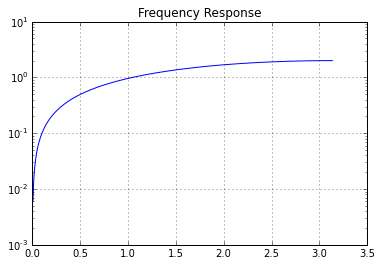

In [11]:
%matplotlib inline
from scipy.signal import freqz
import  numpy as np
import matplotlib.pyplot as plt
frq, resp = freqz([1,-1])
plt.semilogy(frq, np.abs(resp))
plt.title('Frequency Response')
plt.grid()


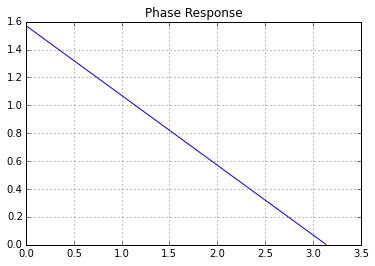

In [12]:
plt.plot(frq, np.angle(resp))
plt.title('Phase Response')
plt.grid()

$$y[n] = x[n] + 0.5 \cdot x[n-1]$$


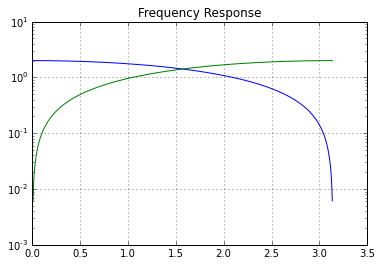

In [14]:
frq, resp = freqz([1,1])
plt.semilogy(frq, abs(resp))

frq, resp = freqz([1,-1])
plt.semilogy(frq, abs(resp))
plt.title('Frequency Response')
plt.grid()

# Transfer function

$$ Y(z) = H(z) \cdot X(z) $$

$$ H(z) = \frac{Y(z)}{X(z)} $$


# z-transform

$$\mathcal{Z}[x[n-M]] = z^{-M}X(z)$$

z-transform on the difference equation:

$$Y(z) = b_0z^{0}X(z) + b_1z^{-1}X(z) + ... + b_Mz^{-M}X(z) - a_1z^{-1}Y(z) - a_2z^{-2}Y(z) - ... - a_Mz^{-M}Y(z)$$

$$ [1 + a_1z^{-1} + a_2z^{-2} - ... + a_Mz^{-M}] \cdot Y(z) = [b_0z^{0} + b_1z^{-1} + ... + b_Mz^{-M}]\cdot X(z) $$

$$H(z) = \frac{Y(z)}{X(z)} = \frac{b_0z^{0} + b_1z^{-1} + ... + b_Mz^{-M}}{ 1 + a_1z^{-1} - a_2z^{-2} - ... - a_Mz^{-M}}$$


# Pole-zero analysis

In [7]:
from scipy.signal import tf2zpk

tf2zpk([1,2,1],[1])

(array([-1., -1.]), array([], dtype=float64), 1.0)

In [5]:
tf2zpk([1],[1, 1])

(array([], dtype=float64), array([-1.]), 1.0)

In [6]:
tf2zpk([2, 2],[1])

(array([-1.]), array([], dtype=float64), 2.0)

In [8]:
def PoleZeroPlot(b, a):
    (zeros,poles,gain) = tf2zpk(b, a)
    angle = np.linspace(-np.pi,np.pi,50)
    cirx = np.sin(angle)
    ciry = np.cos(angle)
    plt.figure()
    plt.plot(poles.real, poles.imag, 'x', zeros.real, zeros.imag, 'o', cirx,ciry, 'k-')
    plt.grid()
    
    plt.xlim((-2, 2))
    plt.xlabel('Real')
    plt.ylim((-1.5, 1.5))
    plt.ylabel('Imag')
    plt.gcf().set_figwidth(5)
    return (zeros,poles,gain)

(array([ 1.,  1.]), array([], dtype=float64), 1.0)

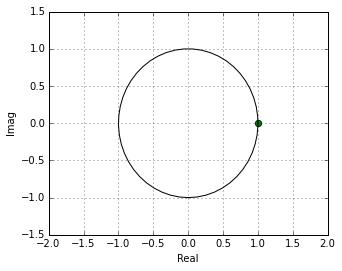

In [9]:
PoleZeroPlot([1,-2,1],[1])

(array([], dtype=float64), array([-1.]), 1.0)

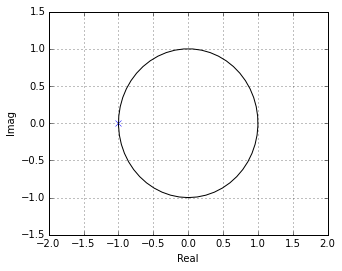

In [10]:
PoleZeroPlot([1],[1,1])